### Data Exploration and targer variable part-1

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Raw_Housing_Prices.csv")

In [3]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [5]:
data['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

### Data Exploration- Target variable part-2

**An outier is a data point that is distinct from other data points.Its value lies outside the usual range of rest of the values in the data and hence the term 'outlier'**

Any data point which is higher than the upper limit or lower than the lower limit can be termed as an outlier

In [6]:
import matplotlib.pyplot as plt


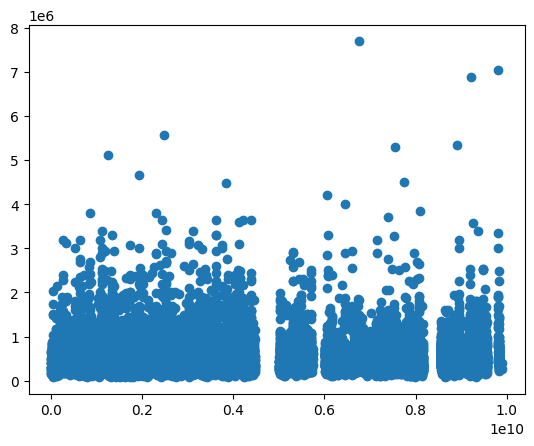

In [7]:
plt.scatter(x=data['ID'],y=data['Sale Price'])

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='Sale Price'>

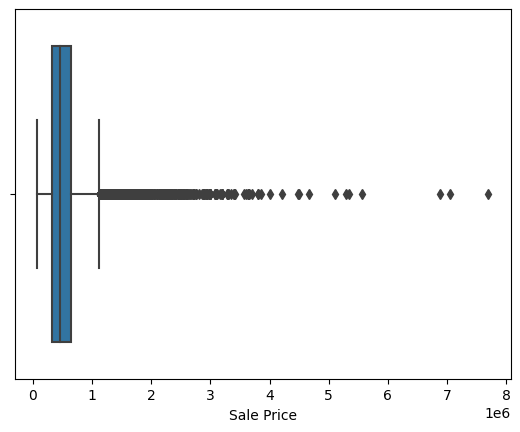

In [9]:
sns.boxplot(x=data['Sale Price'])

In [10]:
#Treatment of Outliers by Imputing

In [11]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [12]:
q1 = data["Sale Price"].quantile(0.25)
q3 = data["Sale Price"].quantile(0.75)

In [13]:
iqr = q3-q1

In [14]:
iqr

323050.0

In [15]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [16]:
def limit_imputer(value):
  if value<lower_limit:
    return lower_limit
  if value>upper_limit:
    return upper_limit
  else:
    return value

In [17]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

In [18]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

Still mean is greater than mode(50%) therefore anamolies still exist.

The data is not normally distributed and a bit skewed towards lower value.

### Data Exploration and target variable part 4

Treating missing values.

* Deletion
* Imputation

>Entire row containing missing value is reduced.We can loose some important informaion , hence not advisable.

>A missing value row is not removed but the missing value in it replaced with the mean/average/mode/median value.
But it is not advisable to do imputation for target value.(Deletion is prefered)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [20]:
data.dropna(inplace=True,axis=0,subset=['Sale Price'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

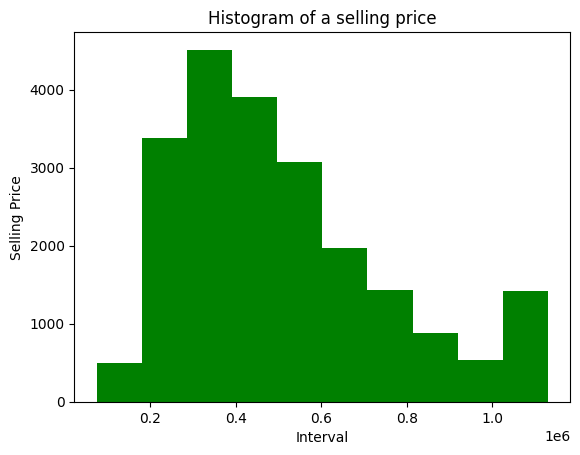

In [22]:
# Plot a histogram
plt.hist(data["Sale Price"],bins=10,color="green")
plt.xlabel("Interval")
plt.ylabel("Selling Price")
plt.title("Histogram of a selling price")
plt.show()

Data is skewed towards lower value

### Data exploration- Independent numerical variable part-1

In [23]:
numerical_columns = ['No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)'
,'Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

fit--> The function calculate the median value with respect to every column that we have passed in as a parameter and store it

Transform-->The function does the actual action of locating the missing values and imputing them using the median strategy.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  float64
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [26]:
#we see zipcode has a missing variable since we are treating zipcode as a categorical variable
column = data['Zipcode'].values.reshape(-1,1)
column

array([[98178.],
       [98125.],
       [98028.],
       ...,
       [98144.],
       [98027.],
       [98144.]])

In [27]:
imputer = SimpleImputer(missing_values=np.nan , strategy ='most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  float64
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [29]:
#Correlation

In [30]:
data['Sale Price'].corr(data['No of Bedrooms'])

0.33940708723592106

In [31]:
# Using numpy
np.corrcoef(data['Sale Price'],data['No of Bedrooms'])

array([[1.        , 0.33940709],
       [0.33940709, 1.        ]])

In [32]:
data.drop(columns=['ID']).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.680914,0.606527,0.307513,-0.064306,0.122021,-0.043047,0.402430,0.045401,0.629944,0.092325
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.349223,0.477549,0.303294,-0.154113,0.018861,-0.152760,-0.008708,0.129569,0.391771,0.029264
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.635638,0.685088,0.283798,-0.505954,0.050761,-0.203951,0.024570,0.223171,0.568568,0.087226
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.705725,0.876226,0.435142,-0.318146,0.055380,-0.199380,0.052538,0.240091,0.756185,0.183223
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.102314,0.183492,0.015252,-0.053119,0.007634,-0.129551,-0.085719,0.229449,0.144507,0.718527
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.461368,0.524031,-0.245572,-0.489244,0.006376,-0.059222,0.049692,0.125620,0.280106,-0.011204
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,1.000000,0.705153,0.145232,-0.456711,0.010436,-0.185844,0.111226,0.201736,0.681362,0.107581
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.705153,1.000000,-0.051825,-0.423848,0.023308,-0.261124,-0.000819,0.343793,0.731996,0.194106
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.145232,-0.051825,1.000000,0.133072,0.071328,0.074933,0.110451,-0.144822,0.200302,0.017263
Age of House (in Years),-0.064306,-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,-0.456711,-0.423848,0.133072,1.000000,0.224861,0.346928,0.148083,-0.409515,-0.326307,-0.071016


In [33]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [34]:
mapping = {'None':"0",
           'Once':"1",
           'Twice':"2",
           'Thrice':"3",
           'Four':"4"}

In [35]:
data['No of Times Visited']=data['No of Times Visited'].map(mapping)

In [36]:
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [37]:
data['Ever Renovate']=np.where(data['Renovated Year']==0,'No','Yes')

In [38]:
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate
0,7129300520,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3.0,2.50,1530.0,1131.0,3.0,No,0,...,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509,No
21609,6600060120,15 February 2016,400000.0,4.0,2.50,2310.0,5813.0,2.0,No,0,...,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200,No
21610,1523300141,14 June 2017,402101.0,2.0,0.75,1020.0,1350.0,2.0,No,0,...,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007,No
21611,291310100,15 January 2016,400000.0,3.0,2.50,1600.0,2388.0,2.0,No,0,...,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287,No


In [39]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

- 'Condition of the House' is a ordinal categorical variable since there is asense of order among levels where
- where Excellent>Good>Fair>Okay>Bad

In [40]:
data.drop(columns='ID',inplace=True)

<AxesSubplot:xlabel='Condition of the House'>

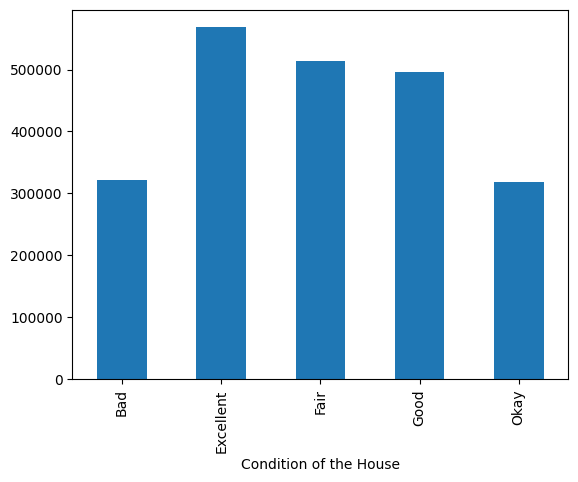

In [41]:
data.groupby('Condition of the House',)['Sale Price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Waterfront View'>

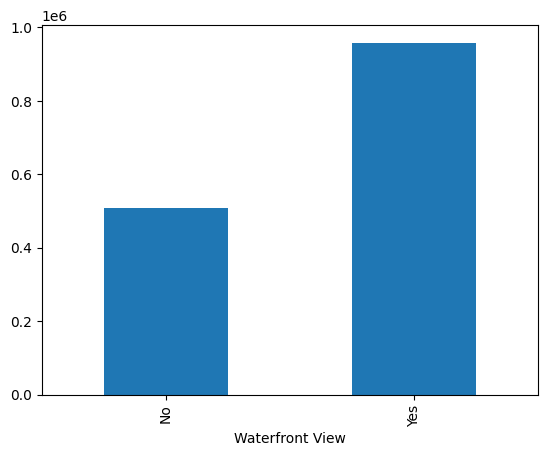

In [42]:
data.groupby('Waterfront View',)['Sale Price'].mean().sort_values().plot(kind='bar')

## Anova

It is of 2 kinds.
* one way
* Two way


In [43]:
# Import libraries
from statsmodels.formula.api import ols 
import statsmodels.api as sm


In [44]:
data = data.rename(columns={'Sale Price':'Sale_price'})

In [45]:
data = data.rename(columns={'Condition of the House':'Condition_of_the_House'})

In [46]:
data = data.rename(columns={'Ever Renovate':'Ever_Renovated'})

In [47]:
data = data.rename(columns={'Waterfront View':'Waterfront_view'})

In [48]:
data.head()

,Date House was Sold,Sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_view,No of Times Visited,Condition_of_the_House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated
0,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [49]:
mod = ols('Sale_price ~ Condition_of_the_House',data=data).fit()
sm.stats.anova_lm(mod,typ=2) 

,sum_sq,df,F,PR(>F)
Condition_of_the_House,1.441831e+13,4.0,58.25563,5.447605e-49
Residual,1.336752e+15,21604.0,NaN,NaN


the p-value is less than 0.5 so we accept the alternate hypothesis

In [50]:
mod = ols('Sale_price ~ Waterfront_view',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Waterfront_view,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [51]:
mod = ols('Sale_price ~ Ever_Renovated',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [52]:
mod = ols('Sale_price ~ Zipcode',data=data).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Zipcode,2.503765e+12,1.0,40.112844,2.444308e-10
Residual,1.348666e+15,21607.0,NaN,NaN


### Binning and Creating of Dummy Variables

If a categorical variables has **n** levels,then **n-1** dummy variables are required.

**Why dummie variable creation.**

>Regression modelling requires all the independent variables to be numerical variables.

>By creating dummy variables, we transform a categorical variable into a numerical variable.

* After it's creation we drop the categorical variable.
* 'get_dummies' function is used

In [53]:
data = pd.get_dummies(data,columns = ['Condition_of_the_House'],drop_first=True)

In [54]:
data.head()

,Date House was Sold,Sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_view,No of Times Visited,Overall Grade,...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,0,7,...,98178.0,47.5112,-122.257,1340.0,5650,No,0,1,0,0
1,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,0,7,...,98125.0,47.7210,-122.319,1690.0,7639,Yes,0,1,0,0
2,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,No,0,6,...,98028.0,47.7379,-122.233,2720.0,8062,No,0,1,0,0
3,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,0,7,...,98136.0,47.5208,-122.393,1360.0,5000,No,1,0,0,0
4,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,0,8,...,98074.0,47.6168,-122.045,1800.0,7503,No,0,1,0,0


In [55]:
data = pd.get_dummies(data,columns = ['Waterfront_view','Ever_Renovated'],drop_first=True)
data.head()

,Date House was Sold,Sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_view_Yes,Ever_Renovated_Yes
0,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,47.5112,-122.257,1340.0,5650,0,1,0,0,0,0
1,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,47.7210,-122.319,1690.0,7639,0,1,0,0,0,1
2,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,0,6,770.0,...,47.7379,-122.233,2720.0,8062,0,1,0,0,0,0
3,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,47.5208,-122.393,1360.0,5000,1,0,0,0,0,0
4,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,47.6168,-122.045,1800.0,7503,0,1,0,0,0,0


**Before moving , first we need to bin the data.**

If the number of levels for a categorical variabl is more , then bin these levels into fewer groups before creating the dummy variables.

In [56]:
zip_table = data.groupby('Zipcode').agg({'Sale_price':'mean'}).sort_values('Sale_price',ascending=True)
#average sale price across all zipcode

In [57]:
zip_table.head()

,Sale_price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [58]:
zip_table['Zipcode_Group'] = pd.cut(zip_table['Sale_price'],bins=10,
                   labels=['Zipcode_Group_0',
                           'Zipcode_Group_1',
                           'Zipcode_Group_2',
                           'Zipcode_Group_3',
                           'Zipcode_Group_4',
                           'Zipcode_Group_5',
                           'Zipcode_Group_6',
                           'Zipcode_Group_7',
                           'Zipcode_Group_8',
                           'Zipcode_Group_9',
                           ],include_lowest=True)

In [59]:
zip_table.head()

,Sale_price,Zipcode_Group
Zipcode,,
98002.0,234284.035176,Zipcode_Group_0
98168.0,240328.371747,Zipcode_Group_0
98032.0,251296.240000,Zipcode_Group_0
98001.0,280804.690608,Zipcode_Group_0
98148.0,284908.596491,Zipcode_Group_0


In [60]:
# We will perform left join here
data = pd.merge(data,zip_table,left_on='Zipcode',how='left',right_index=True)

In [61]:
data.head()

,Date House was Sold,Sale_price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_view_Yes,Ever_Renovated_Yes,Sale_price_y,Zipcode_Group
0,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,1340.0,5650,0,1,0,0,0,0,308435.561069,Zipcode_Group_0
1,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1690.0,7639,0,1,0,0,0,1,462330.404878,Zipcode_Group_2
2,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,0,6,770.0,...,2720.0,8062,0,1,0,0,0,0,460825.088339,Zipcode_Group_2
3,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,1360.0,5000,1,0,0,0,0,0,540466.049430,Zipcode_Group_3
4,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,1800.0,7503,0,1,0,0,0,0,666588.201814,Zipcode_Group_4


In [62]:
data = pd.get_dummies(data,columns = ['Zipcode_Group'],drop_first=True)

In [63]:
data.head()

,Date House was Sold,Sale_price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Sale_price_y,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,308435.561069,0,0,0,0,0,0,0,0,0
1,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,462330.404878,0,1,0,0,0,0,0,0,0
2,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,0,6,770.0,...,460825.088339,0,1,0,0,0,0,0,0,0
3,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,540466.049430,0,0,1,0,0,0,0,0,0
4,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,666588.201814,0,0,0,1,0,0,0,0,0


In [64]:
data.columns

Index(['Date House was Sold', 'Sale_price_x', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'No of Times Visited', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Condition_of_the_House_Excellent', 'Condition_of_the_House_Fair',
       'Condition_of_the_House_Good', 'Condition_of_the_House_Okay',
       'Waterfront_view_Yes', 'Ever_Renovated_Yes', 'Sale_price_y',
       'Zipcode_Group_Zipcode_Group_1', 'Zipcode_Group_Zipcode_Group_2',
       'Zipcode_Group_Zipcode_Group_3', 'Zipcode_Group_Zipcode_Group_4',
       'Zipcode_Group_Zipcode_Group_5', 'Zipcode_Group_Zipcode_Group_6',
       'Zipcode_Group_Zipcode_Group_7', 'Zipcode_Group_Zipcode_Group_8',
       'Zipcode_Group_Zipcode_Group_9

In [65]:
data = data.drop(columns=['Sale_price_y','Zipcode'])

## Splitting of data into Train and Test Datasets

1) First step

Seprate the data into **Dependent variable(Y)** and **independent variable(X)**

In [66]:
data.head()

,Date House was Sold,Sale_price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1,0,1,0,0,0,0,0,0,0
2,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


In [67]:
# In "iloc" function last index is not considered
Y = data.iloc[:,0]
X=data.iloc[:,2:32]

In [68]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3.0,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,1,0,1,0,0,0,0,0,0,0
2,2.0,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,4.0,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,3.0,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0


In [69]:
Y.head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

### Splitting of data into train and test

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

### Feature Scaling

In [72]:
X.describe()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
count,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,...,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,7.623490,1788.319589,291.513490,46.999722,84.417881,...,0.042297,0.109399,0.188625,0.149706,0.186681,0.043824,0.076450,0.012449,0.027720,0.002314
std,0.929916,0.770097,918.347816,4.142353e+04,0.539909,1.105519,827.977604,442.570991,29.373317,401.714775,...,0.201271,0.312146,0.391220,0.356791,0.389665,0.204709,0.265722,0.110879,0.164173,0.048048
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [74]:
X_train.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
78,3.0,1.00,1410.0,5060.0,1.0,0,7,910.0,500,62,...,0,1,0,0,0,0,0,0,0,0
15433,4.0,3.00,1790.0,3600.0,1.5,0,8,1790.0,0,117,...,0,0,0,0,1,0,0,0,0,0
9599,4.0,2.50,1982.0,6406.0,2.0,0,8,1982.0,0,14,...,0,0,0,0,0,0,0,0,0,0
18286,3.0,2.25,2020.0,3600.0,2.0,0,8,2020.0,0,20,...,0,0,0,0,0,1,0,0,0,0
220,4.0,2.50,2760.0,6440.0,2.0,0,10,2760.0,0,19,...,0,0,0,0,0,0,1,0,0,0


In [75]:
X_train = scale.fit_transform(X_train)
X_train

array([[-0.39410482, -1.43854157, -0.72364835, ..., -0.10881294,
        -0.16775069, -0.04884348],
       [ 0.71516751,  1.16452751, -0.30511757, ..., -0.10881294,
        -0.16775069, -0.04884348],
       [ 0.71516751,  0.51376024, -0.09364938, ..., -0.10881294,
        -0.16775069, -0.04884348],
       ...,
       [-0.39410482, -0.13700703, -0.80074612, ..., -0.10881294,
        -0.16775069, -0.04884348],
       [ 0.71516751,  0.83914387,  0.47687415, ..., -0.10881294,
        -0.16775069, -0.04884348],
       [ 0.71516751,  0.51376024,  1.35799159, ..., -0.10881294,
        -0.16775069, -0.04884348]])

In [76]:
X_test = scale.fit_transform(X_test)
X_test

array([[-1.41815824, -0.49985407, -0.21227261, ..., -0.11998018,
        -0.17138963, -0.04652061],
       [-0.41016352, -0.82297243, -1.05141406, ..., -0.11998018,
        -0.17138963, -0.04652061],
       [-0.41016352, -0.49985407, -1.01954793, ..., -0.11998018,
        -0.17138963, -0.04652061],
       ...,
       [-0.41016352, -0.82297243, -0.69026457, ..., -0.11998018,
        -0.17138963, -0.04652061],
       [ 1.60582593,  2.73132945,  2.16706518, ..., -0.11998018,
        -0.17138963, -0.04652061],
       [ 0.59783121, -0.82297243, -0.20165056, ..., -0.11998018,
        -0.17138963, -0.04652061]])

### Parameter of linear regression model

cost function curves.

In [77]:
data.head()

,Date House was Sold,Sale_price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1,0,1,0,0,0,0,0,0,0
2,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


### Gradient Descent
It is an optimization algorithm that works iteratively and aims to find the minimun value of a convex function with respect to a set of parameters.

#### Following Steps involved.
**Step-1** : Random Initialization.

Slope m, Intercept c (Take random value)

**Step-2**: Generate Predictions.

Equation of line  y_hat= mX+C (m,c-->Already initialize).

**Step-3**: Calculating the cost.

t (tau)= sum((y_hat - y)/n)

**Step-4**:Updation of Parameters

In [84]:
def param_init(Y):
  '''
  Step-1
  Y= target variable
  return initialize value of m and c
  '''

  m=0.1
  c=Y.mean()
  return m,c

In [85]:
def generate_prediction(m,c,X):
  '''
  step-2
  X= independent variable
  return prediction generated by line with parameters m,c
  '''
  prediction=[]
  for x in X:
    pred=(m*x)+c
    prediction.append(pred)
  return prediction

In [86]:
def compute_cost(prediction,Y):
  '''
  step-3
  return the mean squared error between prediction and Y
  '''
  cost = np.sum(((prediction-Y)**2)/len(Y))
  return cost


In [87]:
def gradient(prediction,Y,X):
  '''
  step-4 part-1
  return Gradient corresponding to m and c
  '''
  n=len(Y)
  Gm = 2/n*np.sum((prediction-Y)*X)
  Gc = 2/n*np.sum((prediction-Y))
  return Gm,Gc

In [88]:
def param_update(m_old,c_old,Gm_old,Gc_old,alpha):
  '''
  step-4 part-2
  Update and return the new value of m and c
  '''
  m_new = m_old-alpha*Gm_old
  c_new = c_old-alpha*Gc_old
  return m_new,c_new

In [89]:
def result(m,c,X,Y,cost,predictions,i):
  # print and plot the final result obtained from gradient descent
  # If the Gradient Descent converged to the optimum value before max_iter

  if i<max_iter-1:
    print("****** Gradient Descent has converged at iteration {} ******".format(i))
  else:
    print("******* Result after",max_iter,'iteration is: *****')
  
  # Plotting the final result
  plt.figure(figsize=(14,7),dpi=120)
  plt.scatter(X,Y,color='red',label='data points')
  label='final regression line: m={}; c={}'.format(str(m),str(c))
  plt.plot(X,predictions,color='blue',label=label)
  plt.xlabel('Flat_area')
  plt.ylabel('Sale_price')
  plt.title('Final regression line')
  plt.legend()
    

In [92]:
# Making the regression model for sale_price based on flat_area
sale_price = data['Sale_price_x'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data= pd.DataFrame({'sale_price':sale_price, 'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


After Iteration 0 : m = 3499072.307222223 ; c = 465999.44299999997 ; Cost = 64177937552.075005
After Iteration 20 : m = 7.115927055971628e+105 ; c = 2.997778392048355e+102 ; Cost = 2.7417231010181384e+208
After Iteration 40 : m = 1.447154337383132e+205 ; c = 6.096532424296826e+201 ; Cost = inf
After Iteration 60 : m = 2.9430538842431367e+304 ; c = 1.2398417341018387e+301 ; Cost = inf
After Iteration 80 : m = nan ; c = nan ; Cost = nan
After Iteration 100 : m = nan ; c = nan ; Cost = nan
After Iteration 120 : m = nan ; c = nan ; Cost = nan
After Iteration 140 : m = nan ; c = nan ; Cost = nan
After Iteration 160 : m = nan ; c = nan ; Cost = nan
After Iteration 180 : m = nan ; c = nan ; Cost = nan
After Iteration 200 : m = nan ; c = nan ; Cost = nan
After Iteration 220 : m = nan ; c = nan ; Cost = nan
After Iteration 240 : m = nan ; c = nan ; Cost = nan
After Iteration 260 : m = nan ; c = nan ; Cost = nan
After Iteration 280 : m = nan ; c = nan ; Cost = nan
After Iteration 300 : m = nan ;

C:\Users\nabar\AppData\Local\Temp\ipykernel_15804\3243917365.py:6: RuntimeWarning: overflow encountered in square
  cost = np.sum(((prediction-Y)**2)/len(Y))
C:\Users\nabar\AppData\Local\Temp\ipykernel_15804\1334523716.py:23: RuntimeWarning: invalid value encountered in double_scalars
  if abs(cost_new - cost_old) < 10**(-7):
C:\Users\nabar\AppData\Local\Temp\ipykernel_15804\1413743921.py:7: RuntimeWarning: overflow encountered in multiply
  Gm = 2/n*np.sum((prediction-Y)*X)
c:\Users\nabar\.pyenv\pyenv-win\versions\3.8.5\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\nabar\AppData\Local\Temp\ipykernel_15804\255567706.py:6: RuntimeWarning: invalid value encountered in double_scalars
  m_new = m_old-alpha*Gm_old
C:\Users\nabar\AppData\Local\Temp\ipykernel_15804\255567706.py:7: RuntimeWarning: invalid value encountered in double_scalars
  c_new = c_old-alpha*Gc_old


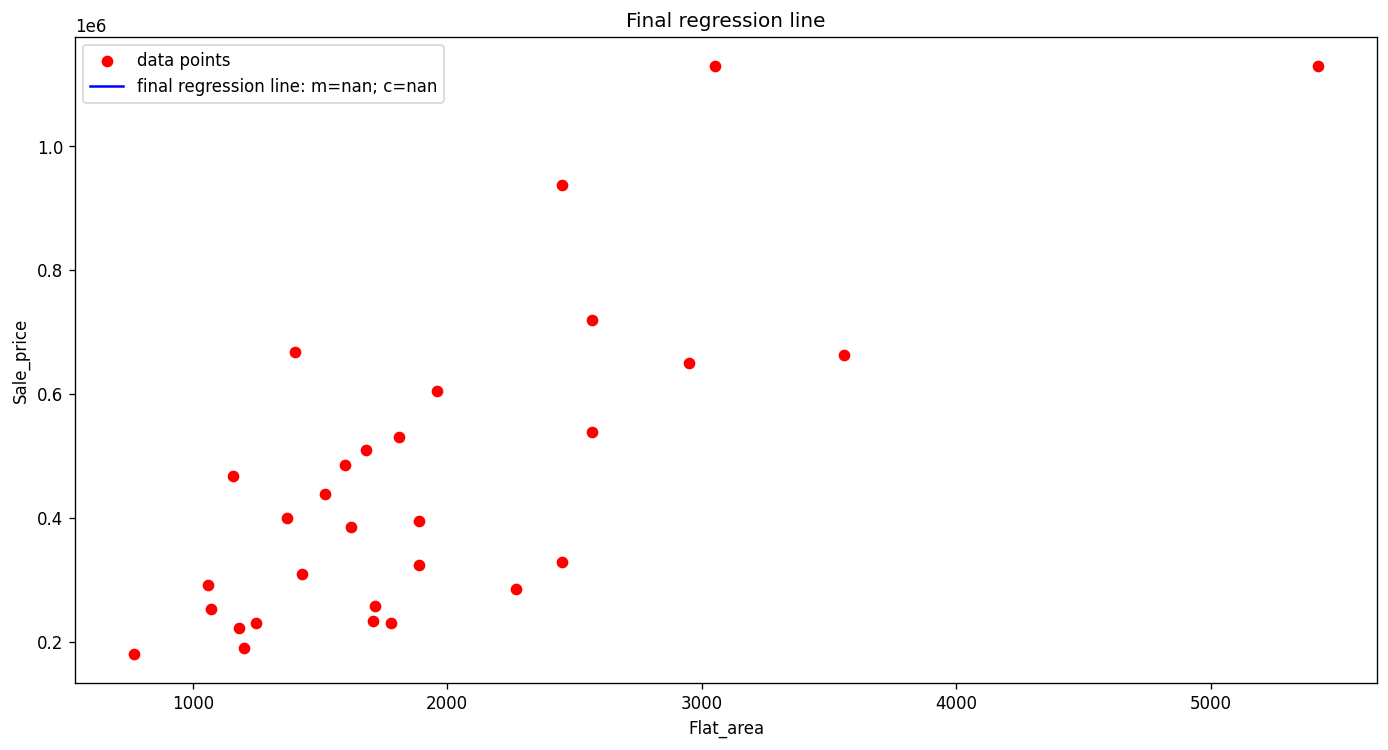

In [93]:
## defining and reshaping the dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_prediction(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradient(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

After Iteration 0 : m = 0.11316346413633305 ; c = 1.1849780416165836e-16 ; Cost = 0.85836535863667
After Iteration 20 : m = 0.3275595607435688 ; c = 1.240489192847842e-16 ; Cost = 0.6182472245590185
After Iteration 40 : m = 0.4706921039517346 ; c = 1.3248661427193537e-16 ; Cost = 0.5112264752046607
After Iteration 60 : m = 0.5662485308150865 ; c = 1.415904430738617e-16 ; Cost = 0.46352728398628984
After Iteration 80 : m = 0.6300427631414932 ; c = 1.4951003398285442e-16 ; Cost = 0.4422677351921283
After Iteration 100 : m = 0.6726323011945988 ; c = 1.611303683072644e-16 ; Cost = 0.4327923457067555
After Iteration 120 : m = 0.7010654163122192 ; c = 1.666074685620818e-16 ; Cost = 0.42856916078553225
After Iteration 140 : m = 0.7200475906265729 ; c = 1.6660746856208182e-16 ; Cost = 0.4266868855601835
After Iteration 160 : m = 0.7327202415200801 ; c = 1.669405354694694e-16 ; Cost = 0.42584795473189874
After Iteration 180 : m = 0.7411806042798547 ; c = 1.6694053546946945e-16 ; Cost = 0.425474

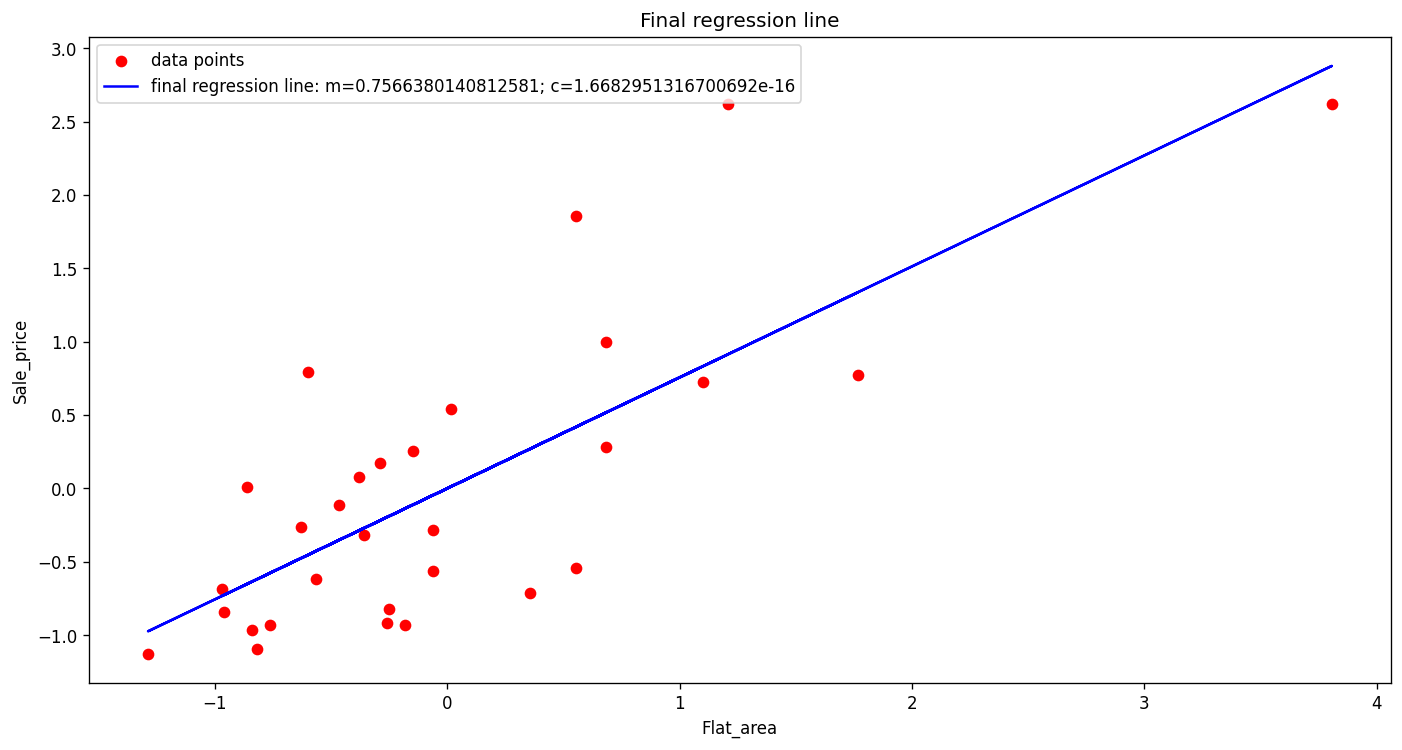

In [94]:
# Gradient Desecent with scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
## defining and reshaping the dataset
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_prediction(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradient(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

## Part-4
### Treating Multicollinearity

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
data.head()

,Date House was Sold,Sale_price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1,0,1,0,0,0,0,0,0,0
2,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,0,0,0,1,0,0,0,0,0,0
4,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


In [101]:
data=data.drop('Date House was Sold',axis='columns')

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y= data['Sale_price_x']  # target variable
X = scaler.fit_transform(data.drop(columns=['Sale_price_x']))
X = pd.DataFrame(data=X,columns=data.drop(columns=['Sale_price_x']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


**Checking and removing Multicollinearity**

In [103]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,0.018573,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.050282,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.055111,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.007736,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.006297,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.104051,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.010010,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.023202,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.070969,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.225182,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


900 corellation , working with this is very hectic

In [107]:
z=X.corr()
k=z.loc['No of Bedrooms','No of Bathrooms']
k

0.515812537183855

In [108]:
# pair of independent variables with corellation greater then 0.5
k = X.corr()
z= [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>0.5 and (i!=j))]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

### Calculating VIF

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=X

# calculating VIF for each column
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(VIF)

(No of Bedrooms                                   1.639458
 No of Bathrooms                                  3.374935
 Flat Area (in Sqft)                           1481.681569
 Lot Area (in Sqft)                               2.108078
 No of Floors                                     2.127777
 No of Times Visited                              1.432392
 Overall Grade                                    2.967352
 Area of the House from Basement (in Sqft)     1205.549155
 Basement Area (in Sqft)                        345.465044
 Age of House (in Years)                          2.629534
 Renovated Year                               16143.256018
 Latitude                                         2.471455
 Longitude                                        1.672700
 Living Area after Renovation (in Sqft)           3.068130
 Lot Area after Renovation (in Sqft)              2.144345
 Condition_of_the_House_Excellent                53.577772
 Condition_of_the_House_Fair                    166.1296

In [117]:
VIF[VIF==VIF.max()].index[0]

'Renovated Year'

In [118]:
def MC_remover(data):
  vif = pd.Series([ variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
  if vif.max()>5:
    print(vif[vif==vif.max()].index[0],"has been removed")
    data = data.drop(columns=[vif[vif==vif.max()].index[0]])
    return data
  else:
    print("No multicollinerty present anymore")
    return data

In [119]:
for i in range(7):
  vif_data = MC_remover(vif_data)
vif_data.head()

Renovated Year has been removed
Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No multicollinerty present anymore
No multicollinerty present anymore
No multicollinerty present anymore
No multicollinerty present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


### Remaining columns

In [120]:
VIF = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF,len(VIF)

(No of Bedrooms                               1.638770
 No of Bathrooms                              3.368939
 Lot Area (in Sqft)                           2.107241
 No of Floors                                 2.125825
 No of Times Visited                          1.432216
 Overall Grade                                2.951689
 Area of the House from Basement (in Sqft)    4.578495
 Basement Area (in Sqft)                      1.974298
 Age of House (in Years)                      2.626480
 Latitude                                     2.470290
 Longitude                                    1.672634
 Living Area after Renovation (in Sqft)       3.060879
 Lot Area after Renovation (in Sqft)          2.143993
 Condition_of_the_House_Excellent             1.203580
 Condition_of_the_House_Good                  1.246826
 Condition_of_the_House_Okay                  1.025233
 Waterfront_view_Yes                          1.205904
 Ever_Renovated_Yes                           1.164339
 Zipcode_G

### Train/Test set

In [121]:
X=vif_data
y=data['Sale_price_x']

In [124]:
vif_data

,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.210155,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,4.758385,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.210155,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,-0.398724,0.500326,-0.337386,2.789023,-0.30579,0.340581,-0.311996,-0.658697,-1.293712,1.005026,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21605,0.676667,0.500326,-0.224356,0.936817,-0.30579,0.340581,0.630080,-0.658697,-1.463938,-0.356184,...,-0.210155,2.853220,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21606,-1.474115,-1.772168,-0.332099,0.936817,-0.30579,-0.563993,-0.927969,-0.658697,-1.293712,0.247916,...,-0.210155,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21607,-0.398724,0.500326,-0.307041,0.936817,-0.30579,0.340581,-0.227451,-0.658697,-1.123485,-0.184409,...,-0.210155,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15126, 27), (6483, 27), (15126,), (6483,))

### Linear regression

In [130]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
# lr.fit()-->this function implements the gradient descent and the complete procedure over the training data

c:\Users\nabar\.pyenv\pyenv-win\versions\3.8.5\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [131]:
lr.coef_
# coefficient is nothing but y=m1x1+m2x2.....
# Since data is normalized therefore m0=0

array([ -3793.24288416,  12469.02033367,  14852.22283338,   2399.3435187 ,
        27107.73688498,  60373.42701402,  80408.61345585,  27887.79484691,
        27900.23297394,  21198.51547558, -23868.95488074,  17659.977746  ,
        -2807.05258547,  13868.64879946,   4629.68037368,  -2404.1661601 ,
        10526.86118605,   6539.51214644,  12188.03480391,  33963.80835637,
        63432.0904254 ,  81234.79400771,  50787.03627448,  73467.25408403,
        40306.22705347,  67534.80661981,  21991.35803533])

### Generating prediction over test set

In [132]:
prediction = lr.predict(X_test)
lr.score(X_test,y_test)  # predict R^2

0.845414118792601

## verifying the assumption of Linear regression
## 1 Residuals

In [133]:
residuals = prediction- y_test
residuals_table = pd.DataFrame({'residuals':residuals,
                                'prediction':prediction})
residuals_table = residuals_table.sort_values(by='prediction')

In [145]:
residuals_table

,residuals,prediction
1149,-228694.872178,-1.536949e+05
19452,-213462.623526,-7.146262e+04
4203,-141972.366283,8.027634e+03
11588,-158080.762618,2.991924e+04
13716,-146405.605409,3.359439e+04
...,...,...
6508,367913.677235,1.497489e+06
9254,393406.489415,1.522981e+06
15255,433649.543450,1.563225e+06
18477,444121.971980,1.573697e+06


In [146]:
residuals_table['prediction'].max()

1716171.3482077294

In [135]:
z = [i for i in range(int(residuals_table['prediction'].max()))]
k = [0 for i in range(int(residuals_table['prediction'].max()))]

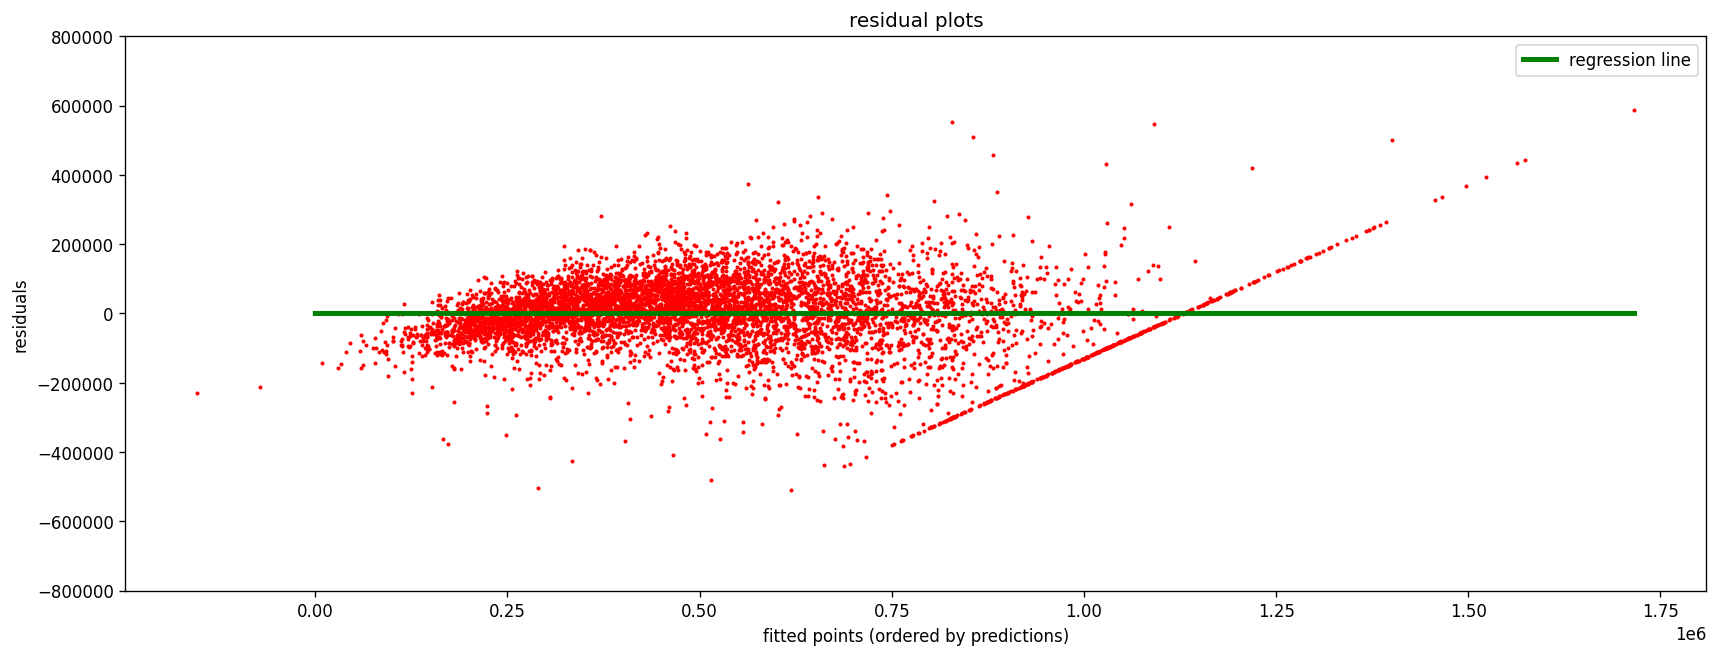

In [137]:
plt.figure(dpi=120,figsize=(17,6))

plt.scatter(residuals_table['prediction'],residuals_table['residuals'],color='red',s=2 )
plt.plot(z,k,color='green',linewidth=3,label="regression line")
plt.ylim(-800000,800000)
plt.xlabel("fitted points (ordered by predictions)")
plt.ylabel("residuals")
plt.title("residual plots")
plt.legend()
plt.show()

Conclusion:

1)The residuals are densely populated between the limit 200000 and -200000.

2)There is good possiblity that the residuals are normally distributed

#### But some outlier present



### 2. Distribution of errors

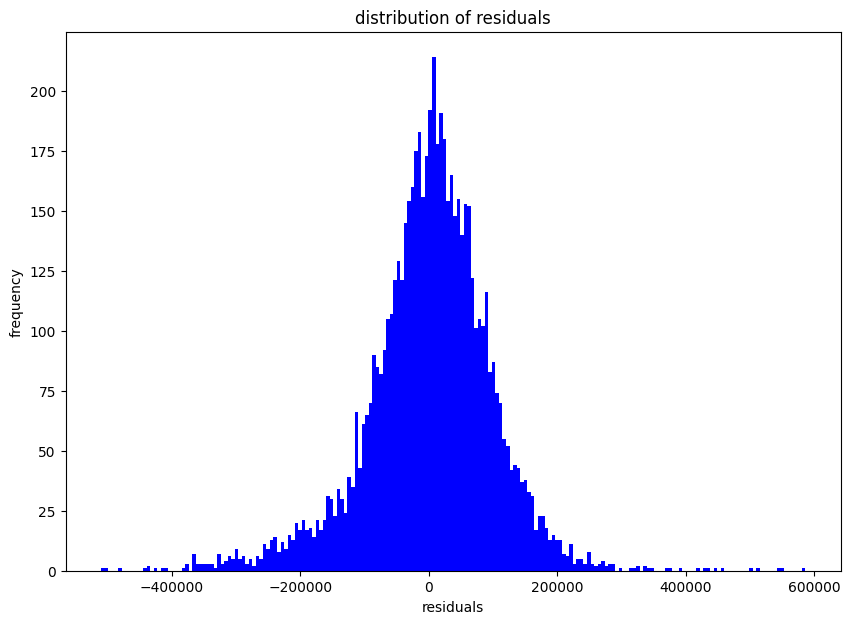

In [138]:
plt.figure(dpi=100,figsize=(10,7))
plt.hist(residuals_table['residuals'],color='blue',bins=200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

Conclusion:

1. Graph is normally distributed but some outlier is also present at far right of plot

In [143]:
lr.coef_

array([ -3793.24288416,  12469.02033367,  14852.22283338,   2399.3435187 ,
        27107.73688498,  60373.42701402,  80408.61345585,  27887.79484691,
        27900.23297394,  21198.51547558, -23868.95488074,  17659.977746  ,
        -2807.05258547,  13868.64879946,   4629.68037368,  -2404.1661601 ,
        10526.86118605,   6539.51214644,  12188.03480391,  33963.80835637,
        63432.0904254 ,  81234.79400771,  50787.03627448,  73467.25408403,
        40306.22705347,  67534.80661981,  21991.35803533])

In [144]:
X_train.columns

Index(['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors', 'No of Times Visited', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Condition_of_the_House_Excellent', 'Condition_of_the_House_Good',
       'Condition_of_the_House_Okay', 'Waterfront_view_Yes',
       'Ever_Renovated_Yes', 'Zipcode_Group_Zipcode_Group_1',
       'Zipcode_Group_Zipcode_Group_2', 'Zipcode_Group_Zipcode_Group_3',
       'Zipcode_Group_Zipcode_Group_4', 'Zipcode_Group_Zipcode_Group_5',
       'Zipcode_Group_Zipcode_Group_6', 'Zipcode_Group_Zipcode_Group_7',
       'Zipcode_Group_Zipcode_Group_8', 'Zipcode_Group_Zipcode_Group_9'],
      dtype='object')

### 4.Model Coefficients

In [139]:
coefficients_table = pd.DataFrame({
    "columns":X_train.columns,
    "coefficients":lr.coef_
})
coefficients_table = coefficients_table.sort_values(by='coefficients')

In [142]:
coefficients_table

,columns,coefficients
10,Longitude,-23868.954881
0,No of Bedrooms,-3793.242884
12,Lot Area after Renovation (in Sqft),-2807.052585
15,Condition_of_the_House_Okay,-2404.166160
3,No of Floors,2399.343519
14,Condition_of_the_House_Good,4629.680374
17,Ever_Renovated_Yes,6539.512146
16,Waterfront_view_Yes,10526.861186
18,Zipcode_Group_Zipcode_Group_1,12188.034804
1,No of Bathrooms,12469.020334


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


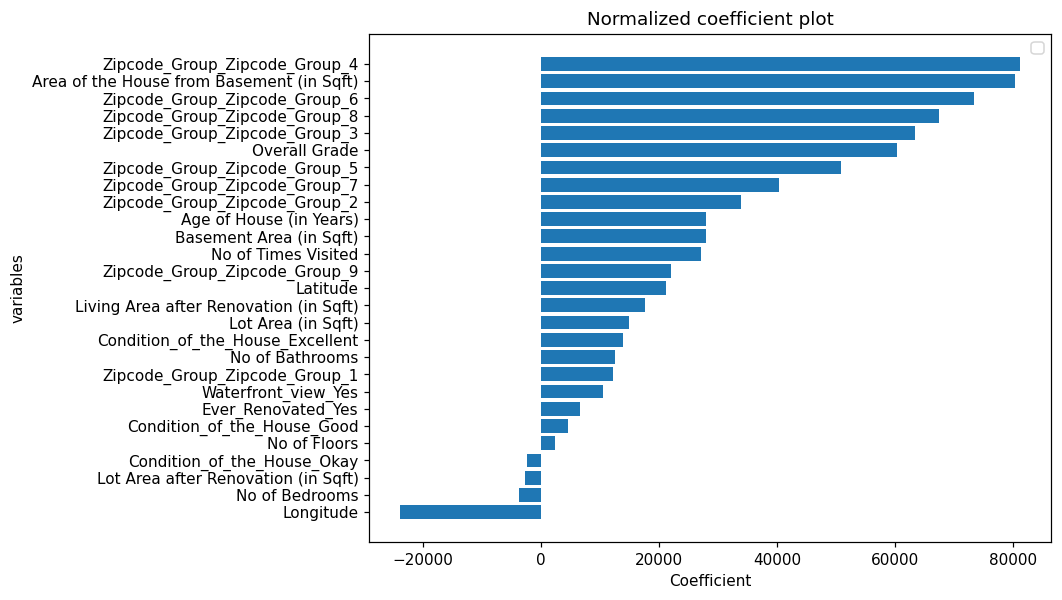

In [140]:
plt.figure(figsize=(8,6),dpi=110)
x = coefficients_table['columns']
y=coefficients_table['coefficients']
plt.barh(x,y)
plt.xlabel('Coefficient')
plt.ylabel('variables')
plt.title("Normalized coefficient plot")
plt.legend()
plt.show()

Conclusion:

1- Zip code group plays important role. The location plays a major role in the "Sale_Price" of the house.

2-Area of house from basement plays a major role, overall grade plays important role.

3- Our model says that older house are more expensive than newer house(New knowledge XD )

4- Year of renovation comes under negative plot.

5- Latitude and Longitude plays a very important role. Hence geographic location also plays imp role.